## This workbook shows some of the main functions you may wish to do using VESIcal.
- For more examples, see our YouTube channel. https://www.youtube.com/channel/UCpvCCs5KMXzOxXWm0seF8Qw

## To run any cells with colored text, press "shift + enter" on a windows PC, and ⇧ and enter for Mac

In [13]:
# First, if you are running VESIcal locally, we need to install it. 
# If you are running on the ENKI server it is already installed, so you don't need to run this cell
!pip install VESIcal

#### First step - Load in VESical and Python things

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v

#### Second step - this just sets some plotting parameters

In [15]:
%matplotlib inline
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

# Example 1 - Calculating saturation pressures for Cassidy et al. 2015
- First load data
- Then inspect data to check it ran properly
- Then run saturation pressure calculation

In [16]:
# Load in melt inclusion data
# Note, in the YouTube video, this was called "BatchFile". ExcelFile is the updated name. 
myfile= v.BatchFile('Cassidy2015_AndesiteMI_YouTubeDemo.xlsx', sheet_name='Sheet1',  input_type='wtpercent')

In [17]:
# Allows you to inspect data, and check VESIcal has read column headings correctly (e.g., non zero values for oxides)
data=myfile.get_data()
data

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,H2O,CO2,Cr2O3,NiO,CoO,P2O5,Phase,Temp
SSH4_1,64.6,0.86,16.4,0.663327,3.3830,0.0,0.87,4.53,4.08,1.05,5.06,0.0105,0.0,0.0,0.0,0.0,Pyx,1050
SSH4_2,63.6,0.59,16.5,0.573328,2.9240,0.0,0.78,4.24,4.31,0.97,5.08,0.0071,0.0,0.0,0.0,0.0,Pyx,1050
SSH10_1,58.7,0.68,15.0,0.928324,4.7345,0.0,2.36,5.70,2.13,2.22,5.62,0.0313,0.0,0.0,0.0,0.0,Ol,1050
SSH5B_1,67.6,0.48,17.0,0.079999,0.4080,0.0,0.02,3.14,4.51,1.58,6.19,0.0043,0.0,0.0,0.0,0.0,Pyx_2,1050
SSH5B_2,67.2,0.70,16.9,0.076666,0.3910,0.0,0.02,3.31,4.49,1.60,5.48,0.0052,0.0,0.0,0.0,0.0,Pyx,1050
SSH10,60.3,0.81,15.8,0.914991,4.6665,0.0,2.80,6.56,1.94,0.32,5.20,0.0250,0.0,0.0,0.0,0.0,Ol,1050
SSH5B,68.0,0.41,16.2,0.233331,1.1900,0.0,0.60,4.20,4.20,1.60,5.70,0.0180,0.0,0.0,0.0,0.0,Pyx,1050
SSH4_3,63.0,0.62,16.0,0.699993,3.5700,0.0,1.10,4.30,3.30,0.90,5.10,0.0140,0.0,0.0,0.0,0.0,Pyx,1050


## By default, VESIcal uses MagmaSat

In [18]:
Sat_P_MagmaSat=myfile.calculate_saturation_pressure(temperature="Temp")

[====================] 100%  Working on sample SSH4_3                            


In [19]:
## We can look at this output
Sat_P_MagmaSat

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,...,P2O5,Phase,Temp,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
SSH4_1,64.6,0.86,16.4,0.663327,3.3830,0.0,0.87,4.53,4.08,1.05,...,0.0,Pyx,1050,1800,0.930494,0.069506,0.001700,0.001700,MagmaSat,
SSH4_2,63.6,0.59,16.5,0.573328,2.9240,0.0,0.78,4.24,4.31,0.97,...,0.0,Pyx,1050,1730,0.949781,0.050219,0.002595,0.002595,MagmaSat,
SSH10_1,58.7,0.68,15.0,0.928324,4.7345,0.0,2.36,5.70,2.13,2.22,...,0.0,Ol,1050,2490,0.877070,0.122930,0.001205,0.001205,MagmaSat,
SSH5B_1,67.6,0.48,17.0,0.079999,0.4080,0.0,0.02,3.14,4.51,1.58,...,0.0,Pyx_2,1050,2200,0.979196,0.020804,0.004954,0.004954,MagmaSat,
SSH5B_2,67.2,0.70,16.9,0.076666,0.3910,0.0,0.02,3.31,4.49,1.60,...,0.0,Pyx,1050,1850,0.967241,0.032759,0.004541,0.004541,MagmaSat,
SSH10,60.3,0.81,15.8,0.914991,4.6665,0.0,2.80,6.56,1.94,0.32,...,0.0,Ol,1050,2190,0.885064,0.114936,0.001682,0.001682,MagmaSat,
SSH5B,68.0,0.41,16.2,0.233331,1.1900,0.0,0.60,4.20,4.20,1.60,...,0.0,Pyx,1050,2170,0.903315,0.096685,0.000074,0.000074,MagmaSat,
SSH4_3,63.0,0.62,16.0,0.699993,3.5700,0.0,1.10,4.30,3.30,0.90,...,0.0,Pyx,1050,1890,0.915986,0.084014,0.000646,0.000646,MagmaSat,


In [20]:
## We can save this output to Excel
Sat_P_MagmaSat.to_excel('SatP_Cassidy_MagmaSat.xlsx')

## We can also run the calculation using another model, we can find model names using the built-in documentation


In [21]:
v.get_model_names()

['ShishkinaIdealMixing',
 'Dixon',
 'IaconoMarziano',
 'Liu',
 'ShishkinaCarbon',
 'ShishkinaWater',
 'DixonCarbon',
 'DixonWater',
 'IaconoMarzianoCarbon',
 'IaconoMarzianoWater',
 'AllisonCarbon',
 'AllisonCarbon_sunset',
 'AllisonCarbon_sfvf',
 'AllisonCarbon_erebus',
 'AllisonCarbon_vesuvius',
 'AllisonCarbon_etna',
 'AllisonCarbon_stromboli',
 'MooreWater',
 'LiuWater',
 'LiuCarbon']

## Lets use Dixon (VolatileCalc Basalt)

In [22]:
Sat_P_Dixon=myfile.calculate_saturation_pressure(temperature="Temp", model="Dixon")
Sat_P_Dixon

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,...,CO2,Cr2O3,NiO,CoO,P2O5,Phase,Temp,SaturationP_bars_VESIcal,Model,Warnings
SSH4_1,64.6,0.86,16.4,0.663327,3.3830,0.0,0.87,4.53,4.08,1.05,...,0.0105,0.0,0.0,0.0,0.0,Pyx,1050,2635.481101,Dixon,
SSH4_2,63.6,0.59,16.5,0.573328,2.9240,0.0,0.78,4.24,4.31,0.97,...,0.0071,0.0,0.0,0.0,0.0,Pyx,1050,2578.048128,Dixon,
SSH10_1,58.7,0.68,15.0,0.928324,4.7345,0.0,2.36,5.70,2.13,2.22,...,0.0313,0.0,0.0,0.0,0.0,Ol,1050,3511.902596,Dixon,
SSH5B_1,67.6,0.48,17.0,0.079999,0.4080,0.0,0.02,3.14,4.51,1.58,...,0.0043,0.0,0.0,0.0,0.0,Pyx_2,1050,3460.577410,Dixon,
SSH5B_2,67.2,0.70,16.9,0.076666,0.3910,0.0,0.02,3.31,4.49,1.60,...,0.0052,0.0,0.0,0.0,0.0,Pyx,1050,2870.231303,Dixon,
SSH10,60.3,0.81,15.8,0.914991,4.6665,0.0,2.80,6.56,1.94,0.32,...,0.0250,0.0,0.0,0.0,0.0,Ol,1050,3050.046748,Dixon,
SSH5B,68.0,0.41,16.2,0.233331,1.1900,0.0,0.60,4.20,4.20,1.60,...,0.0180,0.0,0.0,0.0,0.0,Pyx,1050,3319.092688,Dixon,
SSH4_3,63.0,0.62,16.0,0.699993,3.5700,0.0,1.10,4.30,3.30,0.90,...,0.0140,0.0,0.0,0.0,0.0,Pyx,1050,2742.753642,Dixon,


## Example plot to look at differences between models

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


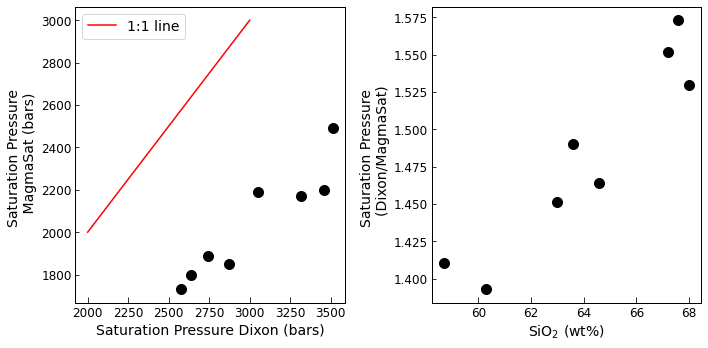

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5)) # Sets up plotting environment as 2 side by side panels

ax1.plot(Sat_P_Dixon['SaturationP_bars_VESIcal'], Sat_P_MagmaSat['SaturationP_bars_VESIcal'], 'ok') # scatter plot, dixon vs. Magmasat
ax1.plot([2000, 3000], [2000, 3000], '-r', label='1:1 line')
ax1.legend()
ax1.set_xlabel('Saturation Pressure Dixon (bars)');
ax1.set_ylabel('Saturation Pressure \n MagmaSat (bars)');

ax2.plot(Sat_P_MagmaSat['SiO2'], Sat_P_Dixon['SaturationP_bars_VESIcal']/Sat_P_MagmaSat['SaturationP_bars_VESIcal'],  'ok')
ax2.set_ylabel('Saturation Pressure \n  (Dixon/MagmaSat)')
ax2.set_xlabel('SiO$_2$ (wt%)')

plt.tight_layout()

## Example 2 - Calculate dissolved volatiles

### Two ways to do this - first, can type out a melt composition

In [24]:
SSH4_1 =v.Sample({'SiO2':  64.6,
 'TiO2':     0.86,
 'Al2O3':    16.4,
 'Fe2O3':     0.663327,
 'FeO':       3.3830,
 'MgO':      0.87,
 'CaO':      4.53,
 'Na2O':      5,
 'K2O':       1.05,
'P2O5':     0.0105})


In [25]:
# X Fluid = 1, means in equilibrium with just H2O vapour
Magmasat_diss_SSH4_1_H2O=v.calculate_dissolved_volatiles(sample=SSH4_1, pressure=1000,  temperature=1200, X_fluid=1).result
Magmasat_diss_SSH4_1_H2O

{'H2O_liq': 3.70725768200104, 'CO2_liq': 0.0}

In [26]:
# X Fluid = 0, means in equilibrium with just CO2 vapour
Magmasat_diss_SSH4_1_CO2_liq=v.calculate_dissolved_volatiles(sample=SSH4_1, pressure=1000,  temperature=1200, X_fluid=0).result
Magmasat_diss_SSH4_1_CO2_liq

{'H2O_liq': 0.0, 'CO2_liq': 0.048045102428479765}

In [27]:
# X Fluid = 0, means in equilibrium with just CO2 vapour
Magmasat_diss_SSH4_1_CO22_liq=v.calculate_dissolved_volatiles(sample=SSH4_1, pressure=1000,  temperature=1200, X_fluid=0.5).result
Magmasat_diss_SSH4_1_CO22_liq

{'H2O_liq': 2.2439206824863063, 'CO2_liq': 0.031073843358327153}

## Otherwise can run for all compositions in a file. 

In [31]:
calc_diss_all=myfile.calculate_dissolved_volatiles(pressure=1000,  temperature=1200, X_fluid=0.3)
calc_diss_all

[====================] 100%  Working on sample SSH4_3                            


,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,...,P2O5,Phase,Temp,H2O_liq_VESIcal,CO2_liq_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,X_fluid_input_VESIcal,Model,Warnings
SSH4_1,64.6,0.86,16.4,0.663327,3.3830,0.0,0.87,4.53,4.08,1.05,...,0.0,Pyx,1050,1.605581,0.043298,1200,1000,0.3,MagmaSat,
SSH4_2,63.6,0.59,16.5,0.573328,2.9240,0.0,0.78,4.24,4.31,0.97,...,0.0,Pyx,1050,1.618778,0.041776,1200,1000,0.3,MagmaSat,
SSH10_1,58.7,0.68,15.0,0.928324,4.7345,0.0,2.36,5.70,2.13,2.22,...,0.0,Ol,1050,1.539873,0.048114,1200,1000,0.3,MagmaSat,
SSH5B_1,67.6,0.48,17.0,0.079999,0.4080,0.0,0.02,3.14,4.51,1.58,...,0.0,Pyx_2,1050,1.663922,0.041058,1200,1000,0.3,MagmaSat,
SSH5B_2,67.2,0.70,16.9,0.076666,0.3910,0.0,0.02,3.31,4.49,1.60,...,0.0,Pyx,1050,1.657953,0.041134,1200,1000,0.3,MagmaSat,
SSH10,60.3,0.81,15.8,0.914991,4.6665,0.0,2.80,6.56,1.94,0.32,...,0.0,Ol,1050,1.540289,0.049288,1200,1000,0.3,MagmaSat,
SSH5B,68.0,0.41,16.2,0.233331,1.1900,0.0,0.60,4.20,4.20,1.60,...,0.0,Pyx,1050,1.661480,0.042335,1200,1000,0.3,MagmaSat,
SSH4_3,63.0,0.62,16.0,0.699993,3.5700,0.0,1.10,4.30,3.30,0.90,...,0.0,Pyx,1050,1.598809,0.045910,1200,1000,0.3,MagmaSat,


# Example 3 - Calculating degassing paths

In [32]:
# Set volatile content of sample here
SSH4_1_moreCO2 =v.Sample({'SiO2':  64.6,
 'TiO2':     0.86,
 'Al2O3':    16.4,
 'Fe2O3':     0.663327,
 'FeO':       3.3830,
 'MgO':      0.87,
 'CaO':      4.53,
 'Na2O':      4.08,
 'K2O':       1.05,
'P2O5':     0.0105,
'H2O': 6,
'CO2': 0.03})


In [33]:
closed_df = v.calculate_degassing_path(sample=SSH4_1_moreCO2, temperature=1200.0, fractionate_vapor=0).result

[====================] 100% Calculating degassing path...


In [34]:
open_df = v.calculate_degassing_path(sample=SSH4_1_moreCO2, temperature=1200.0, fractionate_vapor=1).result

[====================] 100% Calculating degassing path...


In [35]:
# Set amount of initial vapour
closed_df_2init = v.calculate_degassing_path(sample=SSH4_1_moreCO2, temperature=1200.0, fractionate_vapor=0, init_vapor=2.0).result

[====================] 100% Calculating degassing path...


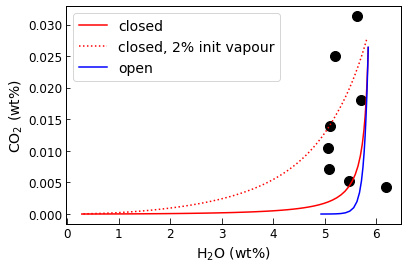

In [36]:
# Less pretty plot - using plt.
plt.plot(data['H2O'], data['CO2'], 'ok')
plt.plot(closed_df['H2O_liq'], closed_df['CO2_liq'], '-r', label='closed')
plt.plot(closed_df_2init['H2O_liq'], closed_df_2init['CO2_liq'], ':r', label='closed, 2% init vapour')

plt.plot(open_df['H2O_liq'], open_df['CO2_liq'], '-b',  label='open')

plt.xlabel('H$_2$O (wt%)')
plt.ylabel('CO$_2$ (wt%)')
plt.legend()

## Or can use default VESIcal plotting

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='H$_2$O wt%', ylabel='CO$_2$ wt%'>)

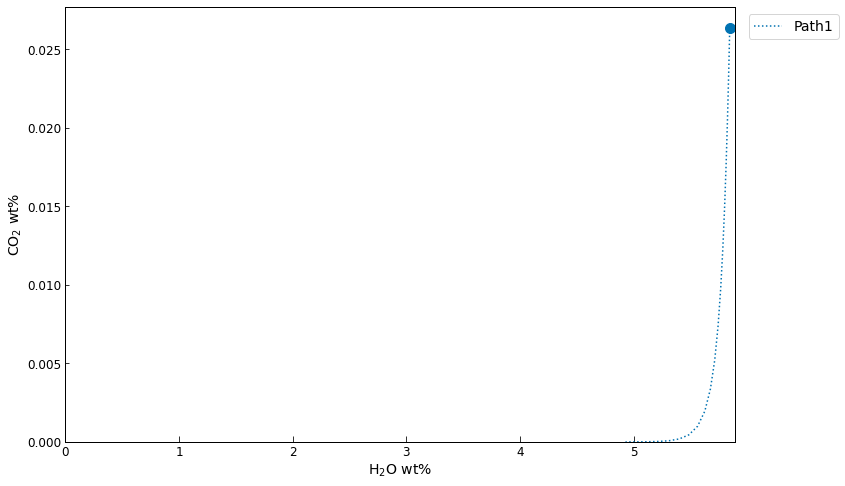

In [37]:
v.plot(degassing_paths=open_df)

# Example 4 - Drawing isobars

## As for all calculations, can run in single sample or batch mode

In [38]:
# Here running on single sample composition at the top of the folder
temperature=1200
pressures=[1000, 2000]

isobars_MagmaSat_ind, isopleths_MagmaSat_ind = v.calculate_isobars_and_isopleths(sample=SSH4_1, smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_MagmaSat_ind = v.vplot.smooth_isobars_and_isopleths(isobars_MagmaSat_ind)

Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!


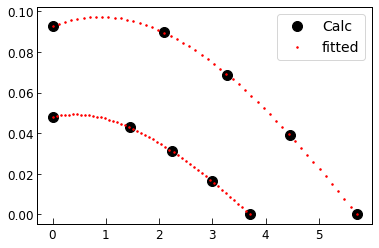

In [39]:
## First output is unsmoothed
plt.plot(isobars_MagmaSat_ind['H2O_liq'], isobars_MagmaSat_ind['CO2_liq'], 'ok', label='Calc')
# Second output is a fit through these points
plt.plot(smoothed_isobars_MagmaSat_ind['H2O_liq'], smoothed_isobars_MagmaSat_ind['CO2_liq'], '.r', ms=3, label='fitted')
plt.legend()

In [40]:
smoothed_isobars_MagmaSat_ind

,Pressure,H2O_liq,CO2_liq
0,1000,0.000000,0.048046
1,1000,0.075658,0.048448
2,1000,0.151317,0.048767
3,1000,0.226975,0.049004
4,1000,0.302633,0.049163
...,...,...,...
95,2000,5.244252,0.015054
96,2000,5.360791,0.011349
97,2000,5.477330,0.007606
98,2000,5.593869,0.003829


In [41]:
smoothed_isobars_MagmaSat_ind.loc[smoothed_isobars_MagmaSat_ind['Pressure']==1000, 'H2O_liq']

0     0.000000
1     0.075658
2     0.151317
3     0.226975
4     0.302633
5     0.378292
6     0.453950
7     0.529608
8     0.605267
9     0.680925
10    0.756583
11    0.832242
12    0.907900
13    0.983558
14    1.059216
15    1.134875
16    1.210533
17    1.286191
18    1.361850
19    1.437508
20    1.513166
21    1.588825
22    1.664483
23    1.740141
24    1.815800
25    1.891458
26    1.967116
27    2.042775
28    2.118433
29    2.194091
30    2.269750
31    2.345408
32    2.421066
33    2.496725
34    2.572383
35    2.648041
36    2.723700
37    2.799358
38    2.875016
39    2.950674
40    3.026333
41    3.101991
42    3.177649
43    3.253308
44    3.328966
45    3.404624
46    3.480283
47    3.555941
48    3.631599
49    3.707258
Name: H2O_liq, dtype: float64

### Might want to plot them as different colors
- We can use the pandas loc function, to find all the rows where Pressure=1000 bars, and 2000 bars and plot them as different colors

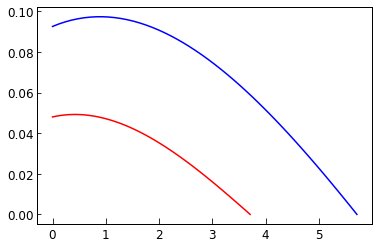

In [42]:
# Plotting 1 kbar isobar
plt.plot(smoothed_isobars_MagmaSat_ind.loc[smoothed_isobars_MagmaSat_ind['Pressure']==1000, 'H2O_liq'], 
          smoothed_isobars_MagmaSat_ind.loc[smoothed_isobars_MagmaSat_ind['Pressure']==1000, 'CO2_liq'],     
         '-r')
# 2 kbar isobar
plt.plot(smoothed_isobars_MagmaSat_ind.loc[smoothed_isobars_MagmaSat_ind['Pressure']==2000, 'H2O_liq'], 
          smoothed_isobars_MagmaSat_ind.loc[smoothed_isobars_MagmaSat_ind['Pressure']==2000, 'CO2_liq'],     
         '-b')

## Or can use VESIcal plotting functions

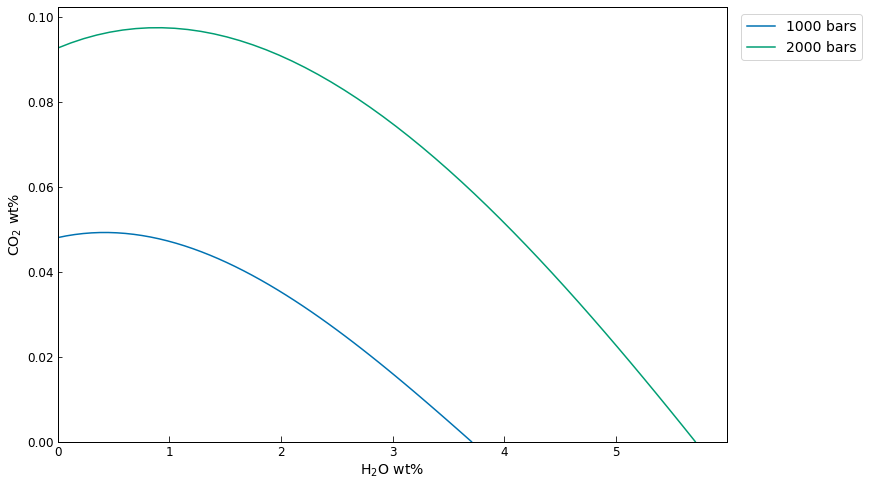

In [43]:
fig, ax = v.plot(isobars=smoothed_isobars_MagmaSat_ind)

## Calculating for entire file 
- No built in function, as this is extremely computationally expensive

In [44]:
isobar_list_1000bars = []
for index, row in myfile.data.iterrows():
    isobar_list_1000bars.append(v.calculate_isobars_and_isopleths(sample=myfile.get_sample_composition(samplename=row.name, asSampleClass=True), 
                                        temperature=1100, pressure_list=[1000], isopleth_list=[0.25, 0.5, 0.75], 
                                                                   print_status=True).result[0])
    print("done a sample")
 

Calculating isobar at 1000 bars
 done.                                                                                                                           
Done!
done a sample
Calculating isobar at 1000 bars
 done.                                                                                                                           
Done!
done a sample
Calculating isobar at 1000 bars
 done.                                                                                                                           
Done!
done a sample
Calculating isobar at 1000 bars
 done.                                                                                                                           
Done!
done a sample
Calculating isobar at 1000 bars
 done.                                                                                                                           
Done!
done a sample
Calculating isobar at 1000 bars
 done.                                                    

Text(0, 0.5, 'CO$_2$ (wt%)')

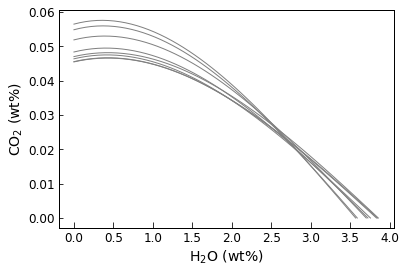

In [45]:

for i in range(0, len(data['H2O'])):
    plt.plot(isobar_list_1000bars[i].H2O_liq, isobar_list_1000bars[i].CO2_liq, color='grey', linewidth=1) # This is 50 Mpa
plt.xlabel('H$_2$O (wt%)')#
plt.ylabel('CO$_2$ (wt%)')